In [2]:
!pip install tensorflow==2.4.0

In [29]:
import numpy as np
from matplotlib import  pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import tensorflow as tf

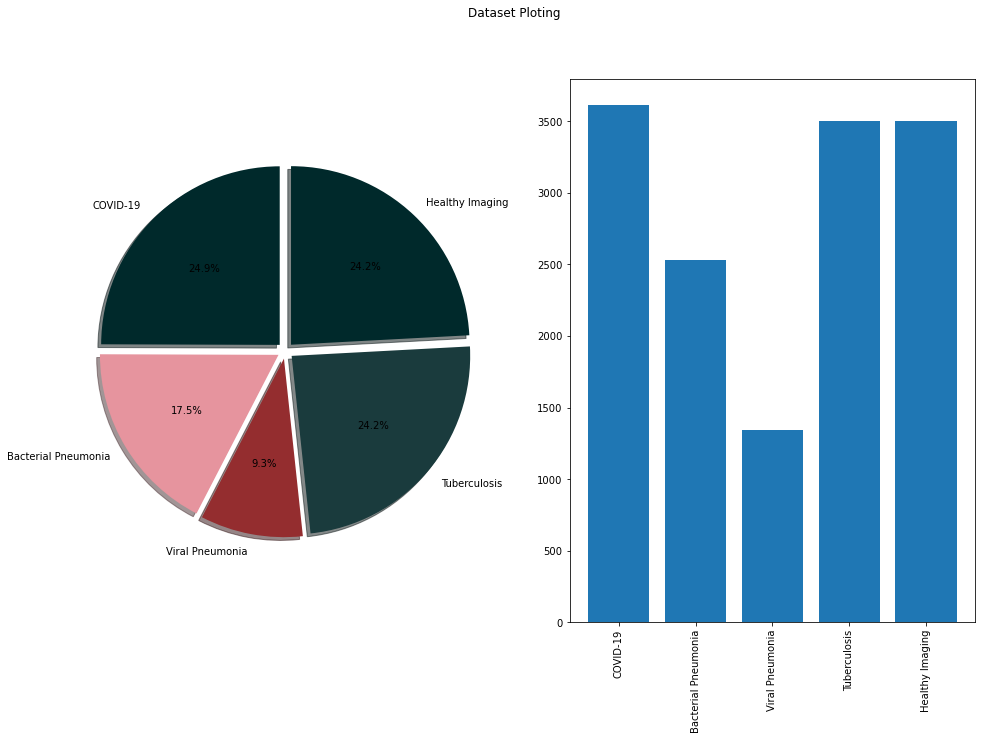

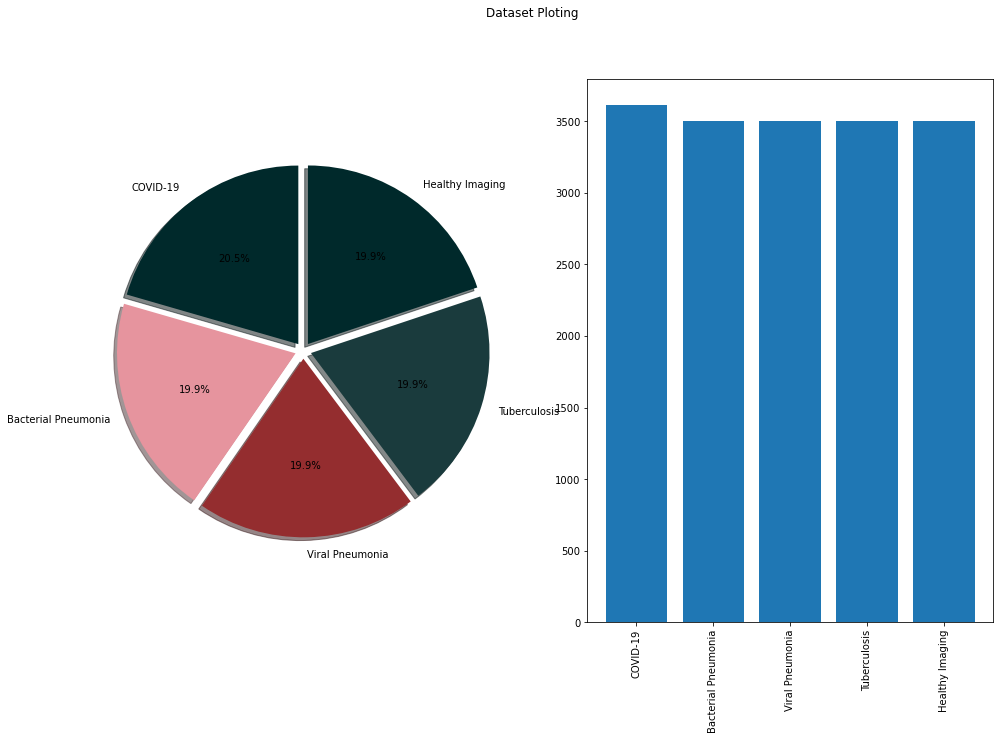

3615


In [11]:
%run './Data preprocessing.ipynb'

In [21]:
X.shape

(17615, 100, 100, 3)

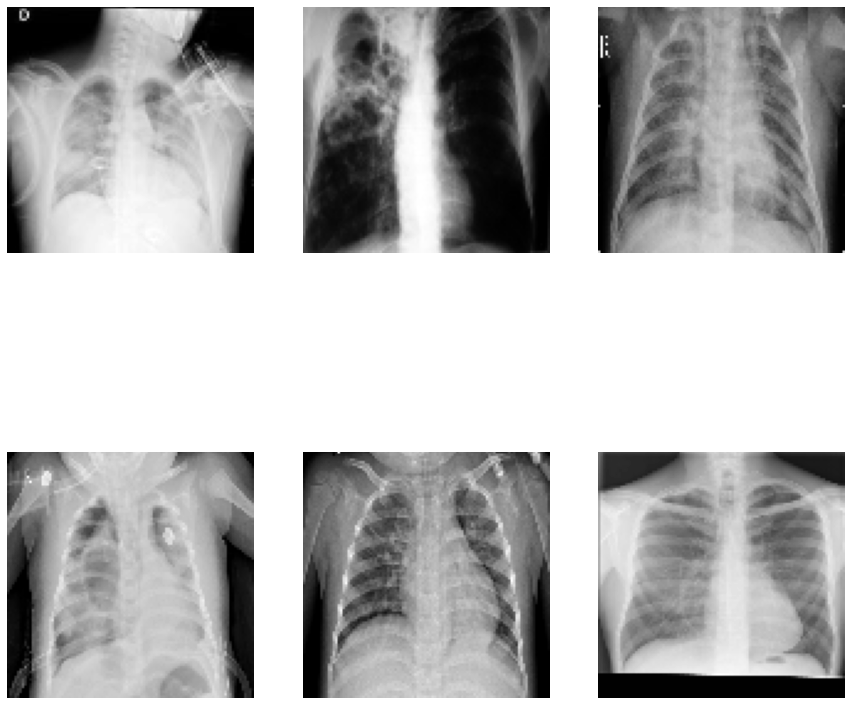

In [13]:
plt.figure(figsize=(15, 15))
for i in range(6):
    ax = plt.subplot(2, 3, i + 1)
    plt.imshow(X[i], cmap="gray")
    plt.axis("off")

In [22]:
y[0:20]

array([0, 3, 2, 1, 2, 3, 1, 2, 3, 0, 0, 3, 1, 3, 2, 3, 0, 3, 3, 2])

In [23]:
X.shape

(17615, 100, 100, 3)

In [16]:
X = np.stack([X]*3, -1)
X.shape

(17615, 100, 100, 3)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [25]:
X_train.shape

(14092, 100, 100, 3)

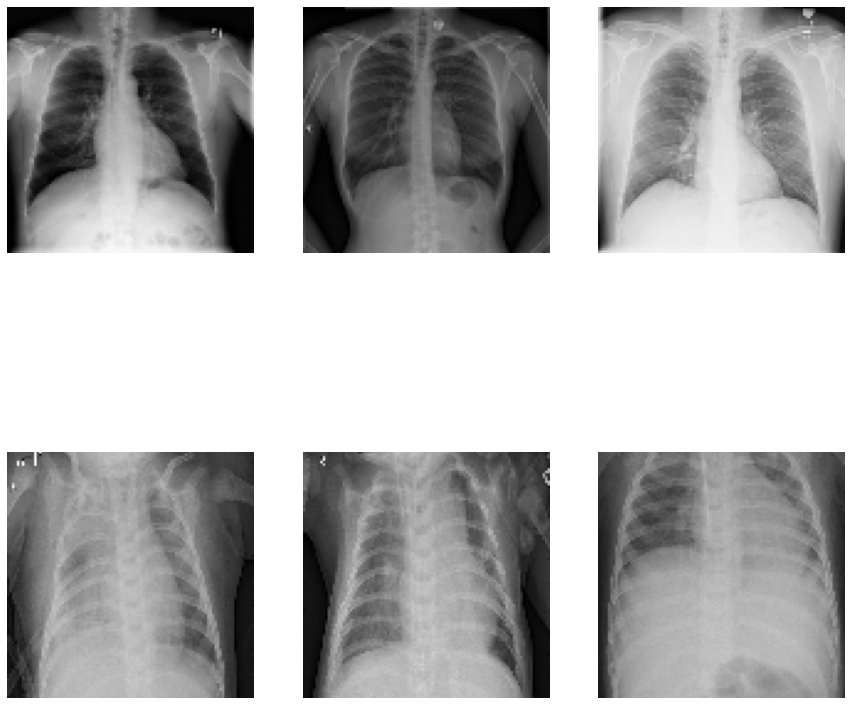

In [14]:
plt.figure(figsize=(15, 15))
for i in range(6):
    ax = plt.subplot(2, 3, i + 1)
    plt.imshow(X_train[i], cmap="gray")
    plt.axis("off")

In [26]:
from tensorflow.keras.layers import Conv2D , Input, Dropout, Dense, Flatten, BatchNormalization, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential, layers , callbacks

Using TensorFlow backend.


In [56]:
input_shape = (100,100,3)
IMAGE_SIZE =  100

# data_augmentation = Sequential(
#   [
#     layers.experimental.preprocessing.RandomFlip("horizontal",input_shape=input_shape ),
#     layers.experimental.preprocessing.RandomRotation(0.2),
#     layers.experimental.preprocessing.RandomZoom(0.2),
#   ]
# )

In [57]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255)
])

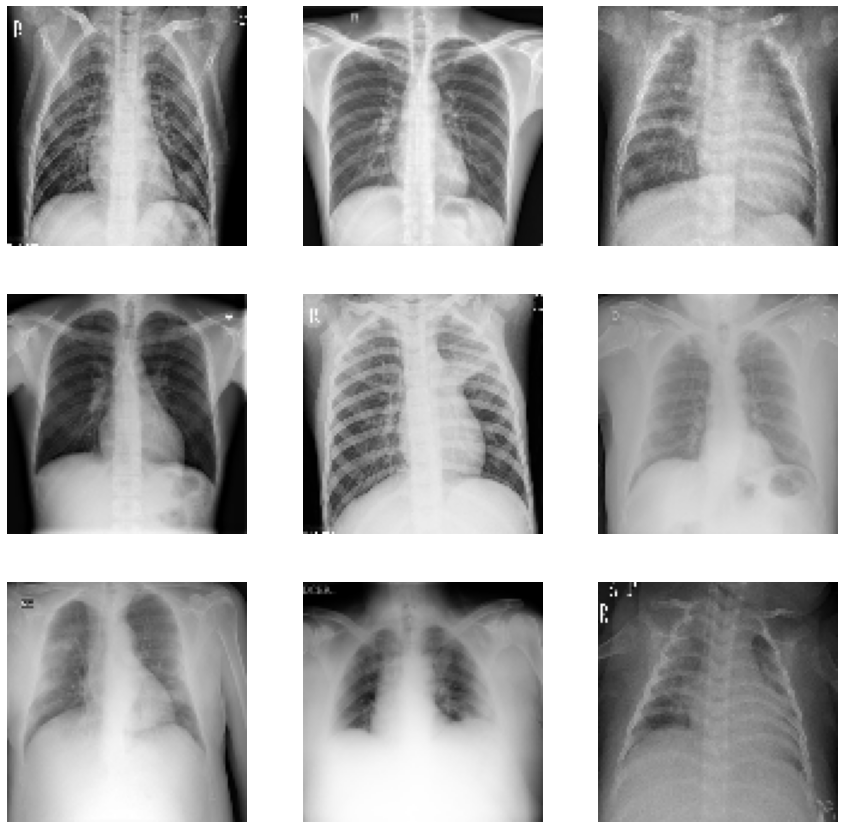

In [36]:
plt.figure(figsize=(15, 15))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(X_train[i])
    plt.axis("off")

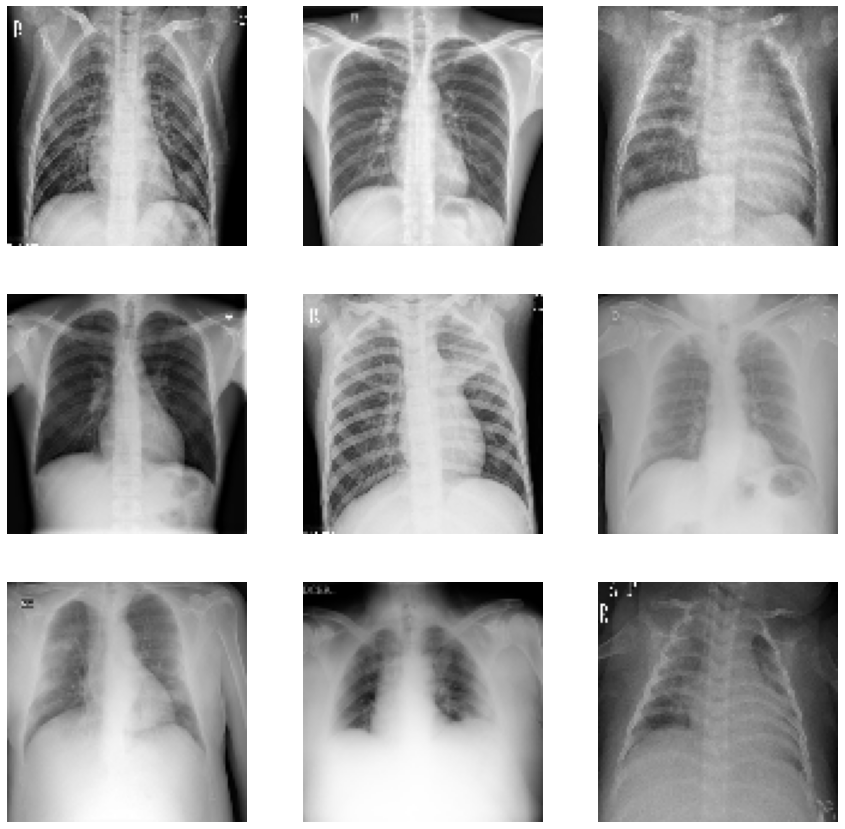

In [50]:
plt.figure(figsize=(15, 15))
for i in range(9):
    augmented_images = resize_and_rescale(X_train[0:9])
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[i])
    plt.axis("off")

In [58]:
i = Input(shape=input_shape)
# x = data_augmentation(i)

# x = Conv2D(32, (3,3) , strides=(2,2), activation="relu" )(x)
# x = BatchNormalization()(x)
# x = Conv2D(64, (3,3) , strides=(2,2) ,activation="relu" )(x)
# x = BatchNormalization()(x)
# x = Conv2D(128, (3,3) , strides=(2,2) ,activation="relu" )(x)

x = resize_and_rescale(i)
x = Conv2D(32, (3,3)  , activation="relu" , padding="same")(x)
x = BatchNormalization()(x)
x = Conv2D(32, (3,3)  , activation="relu", padding="same" )(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)



x = Conv2D(64, (3,3)  , activation="relu" , padding="same")(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3,3)  , activation="relu", padding="same" )(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)



x = Conv2D(128, (3,3)  , activation="relu" , padding="same")(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3,3)  , activation="relu", padding="same" )(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)




x = Flatten()(x)

x = Dropout(0.2)(x) 
x = BatchNormalization()(x)
x = Dense(128,   activation="relu")(x)

x = Dropout(0.2)(x)
x = BatchNormalization()(x)
x = Dense(32, activation="relu")(x)

x = Dropout(0.2)(x)
x = Dense(5,  activation="softmax")(x)

model = Model(i,x)



In [59]:
es = callbacks.EarlyStopping( monitor="val_loss", patience=6, restore_best_weights=True, verbose=1, min_delta=0.01)
mc = callbacks.ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True)
cbs = [es]

In [60]:
# opt = Adam(learning_rate=0.0001)
opt = Adam()
model.compile(optimizer=opt,metrics=["accuracy"] , loss="sparse_categorical_crossentropy")

In [61]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
sequential_7 (Sequential)    (None, 100, 100, 3)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 100, 100, 32)      896       
_________________________________________________________________
batch_normalization_8 (Batch (None, 100, 100, 32)      128       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 100, 100, 32)      9248      
_________________________________________________________________
batch_normalization_9 (Batch (None, 100, 100, 32)      128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 50, 50, 32)        0   

In [ ]:
r = model.fit(X_train, y_train, validation_data=(X_test, y_test),  epochs=15, batch_size=32, callbacks=cbs)

Epoch 1/15
441/441 [==============================] - 483s 1s/step - loss: 0.7746 - accuracy: 0.6830 - val_loss: 1.1584 - val_accuracy: 0.4036
Epoch 2/15
441/441 [==============================] - 476s 1s/step - loss: 0.4002 - accuracy: 0.8325 - val_loss: 0.4505 - val_accuracy: 0.8081
Epoch 3/15
441/441 [==============================] - 484s 1s/step - loss: 0.3129 - accuracy: 0.8637 - val_loss: 0.2950 - val_accuracy: 0.8760
Epoch 4/15
441/441 [==============================] - 483s 1s/step - loss: 0.2853 - accuracy: 0.8806 - val_loss: 0.3325 - val_accuracy: 0.8527
Epoch 5/15
441/441 [==============================] - 567s 1s/step - loss: 0.2453 - accuracy: 0.8995 - val_loss: 0.2411 - val_accuracy: 0.8972
Epoch 6/15
212/441 [=============>................] - ETA: 4:14 - loss: 0.1966 - accuracy: 0.9257

In [ ]:
def plot_acc_graph(history): 
  # Plot loss per iteration
  plt.plot(history['accuracy'], label='acc')
  plt.plot(history['val_accuracy'], label='val_acc')
  plt.legend()

In [ ]:
def plot_loss_graph(history): 
  # Plot loss per iteration
  plt.plot(history['loss'], label='loss')
  plt.plot(history['val_loss'], label='val_loss')
  plt.legend()

In [ ]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)


  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

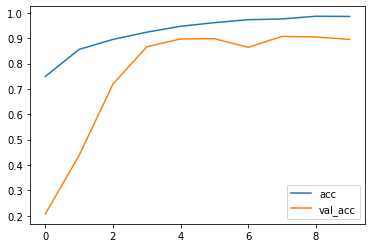

In [ ]:
plot_acc_graph(r.history)

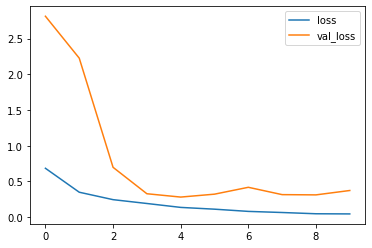

In [ ]:
plot_loss_graph(r.history)

Confusion matrix, without normalization
[[729   4   2  21   2]
 [  4 604  93   0  14]
 [  2  86 597   0  18]
 [ 10   2   0 626   2]
 [  0   0   1   2 703]]


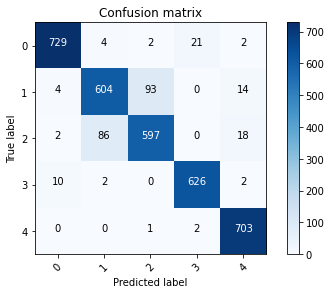

In [ ]:
predictions = model.predict(X[14093:17615]).argmax(axis=1)
cm = confusion_matrix(y[14093:17615], predictions)
plot_confusion_matrix(cm, list(range(5)))
